# Usage of Chemical Names in RHEA and GO

See also [these slides](https://docs.google.com/presentation/d/1JvidhE4mzbyruSCSUrtEyTyYJGGll4ECN8SOhP28_zo/edit?usp=sharing)

## Background

RHEA uses CHEBI to describe the participants in a reaction, e.g. for [RHEA:14057](https://www.rhea-db.org/reaction?id=14057) (a 1,2-diacyl-sn-glycerol + a glycerophospholipid = a monoacylglycerophospholipid + a triacyl-sn-glycerol)

![img](images/rhea-14057.png)


See for example the Rhea label **triacyl-_sn_-glycerol matches** [CHEBI:64615](https://www.ebi.ac.uk/chebi/searchId.do?chebiId=CHEBI:64615)

Here we report on an analysis of usage of chemical entity names in Rhea vs CHEBI

## Rhea Chebi Name matches

We load a pre-generated file https://github.com/cmungall/reactioner/tree/master/reports

This maps the name used in Rhea (after removing any "a" prefix) to a CHEBI name (if available), if not available to a syn. We also include the CHEBI synonym source.

Also, if it doesn't match a name we also see if it maps to IDs for **different** CHEBIs

In [1]:
## Import libraries and methods
import pandas as pd
from notebook_utils import create_venn, create_upset
%matplotlib inline

In [15]:
## Fetch xref data and set up DBs
df = pd.read_csv("reports/compare_rhea_chebi_names.tsv", sep="\t").fillna("")
## Show samples
df

,rhea_participant,pred,xrefs,chebi,chebi label,ambigs,ambigs label,ambig_relations
0,((9Z)-hexadecenoyl-tetradecanoyl)-(Kdo)2-lipid A,related,UniProt,CHEBI:61522,(KDO)2-(palmitoleoyl-myristoyl)-lipid A(6-),,,
1,"(+)-(1(10)E,4E,6S,7R)-germacradien-6-ol",exact,UniProt,CHEBI:137564,"(+)-(1(10)E,4E,6S,7R)-germacradien-6-ol",,,
2,"(+)-(2S,3R,9R)-pristinol",exact,UniProt,CHEBI:138165,"(+)-(2S,3R,9R)-pristinol",,,
3,(+)-(R)-germacrene A,related,UniProt,CHEBI:41595,(+)-germacrene A,,,
4,(+)-2-epi-prezizaene,exact,UniProt,CHEBI:62762,(+)-2-epi-prezizaene,,,
5,(+)-3'-hydroxylarreatricin,exact,UniProt,CHEBI:67154,(+)-3'-hydroxylarreatricin,,,
6,(+)-5-epi-aristolochene,exact,UniProt,CHEBI:23925,(+)-5-epi-aristolochene,,,
7,(+)-6-endo-hydroxycamphor,exact,UniProt,CHEBI:64787,(+)-6-endo-hydroxycamphor,,,
8,(+)-6-exo-hydroxycamphor,exact,UniProt,CHEBI:64786,(+)-6-exo-hydroxycamphor,,,
9,(+)-6a-hydroxymaackiain,exact,UniProt,CHEBI:43129,(+)-6a-hydroxymaackiain,,,


## Plot how often Rhea name matches CHEBI name/synonym/none

Note the y scale is logarithmic

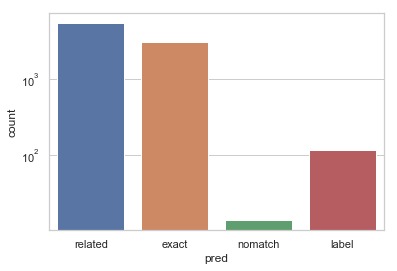

In [20]:
import seaborn as sns
sns.set(style="whitegrid")
g = sns.countplot(x="pred", data=df)
g.set_yscale('log')

We can see that very few of the Rhea names match the main CHEBI name, most match synonyms.

Note that in CHEBI, synonyms make use of the synonym-xref field, which they use to place the name of a database. For example, Rhea uses the name __glycerophospholipid__ for `CHEBI:136912`, and CHEBI provide a related synonym with "UniProt" as the dbxref:

```
[Term]
id: CHEBI:136912
name: 1,2-diacyl-sn-glycero-3-phospholipid
namespace: chebi_ontology
def: "A glycerophospholipid, where R1 and R2 are acyl chains and R3 any of the groups that represent the different phospholipid classes (choline, ethanolamine, glycerol, etc)." []
subset: 3_STAR  ! Manually annotated by ChEBI Team
synonym: "1,2-diacyl-sn-glycero-3-phospholipids" RELATED [ChEBI]
synonym: "a glycerophospholipid" RELATED [UniProt]
xref: KEGG:C00865
is_a: CHEBI:37739  ! glycerophospholipid
```

In fact many of the Rhea names match to "UniProt synonym field", as can be seen below

In [21]:
# add another column to the dataframe corresponding to whether the synonym has 'UniProt' in the syn-xref field:
df['has_uniprot'] = df.apply(lambda row: 'UniProt' in row['xrefs'], axis=1)

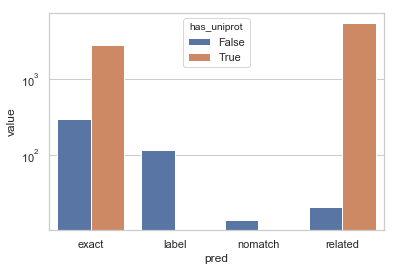

In [24]:
# Make a grouped bar-chart showing number of times a Rhea name matches a chebi label vs synonym,
# but subdivided by whether it's a "UniProt synonym"
ct = pd.crosstab(df.pred, df.has_uniprot)
stacked = ct.stack().reset_index().rename(columns={0:'value'})

# plot grouped bar chart
g = sns.barplot(x=stacked.pred, y=stacked.value, hue=stacked.has_uniprot)
g.set_yscale('log')

## Ambiguous names

Often Rhea will use a name that is not a match to the CHEBI name, and there are >1 potential CHEBI IDs that it can map to.

Here we show a stacked count plot showing number of Rhea participant names broken down by what CHEBI label/synonym they map to, further subdivided by whether it also matches elsewhere

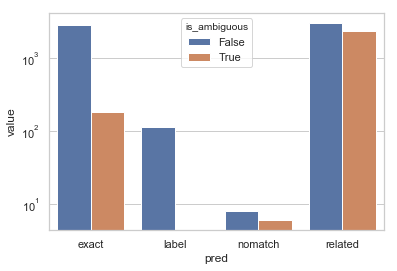

In [25]:
df['is_ambiguous'] = df.apply(lambda row: row['ambigs'] != "", axis=1)
ct = pd.crosstab(df.pred, df.is_ambiguous)
stacked = ct.stack().reset_index().rename(columns={0:'value'})

# plot grouped bar chart
g = sns.barplot(x=stacked.pred, y=stacked.value, hue=stacked.is_ambiguous)
g.set_yscale('log')

## Relationship of ambiguous label to used CHEBI class

We would hope that when a Rhea participant name is ambiguous (maps to >1 CHEBI ID) that the non-used matching ID would bear some relationship to the used one.

For example, in [RHEA:14057](https://www.rhea-db.org/reaction?id=14057) the CHEBI ID (https://www.ebi.ac.uk/chebi/searchId.do?chebiId=CHEBI:136912) is used for *glycerophospholip*, but a more generic CHEBI class uses this string as it's primary name:

![img](images/rhea-14057-ambig.png )

In this case the relationship is subclass, but we can plot all such relationships:

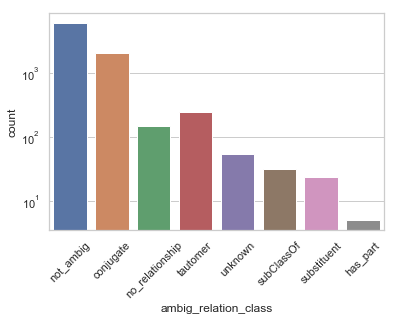

In [34]:
def group_relations(rstr):
    """
    Note that there may be >1 ambiguous class, this reduces to one
    """
    if rstr == "":
        return "not_ambig"
    if 'subClassOf' in rstr:
        return "subClassOf"
    if 'conjugate' in rstr:
        return 'conjugate'
    if 'substituent' in rstr:
        return 'substituent'
    if 'tautomer' in rstr:
        return 'tautomer'
    if 'BFO_0000051' in rstr:
        return 'has_part'
    if 'no_relationship' in rstr:
        return 'no_relationship'
    else:
        return 'unknown'
df['ambig_relation_class'] = df.apply(lambda row: group_relations(row['ambig_relations']), axis=1)
g = sns.countplot(x="ambig_relation_class", data=df)
g.set_xticklabels(g.get_xticklabels(), rotation=45)
g.set_yscale('log')

## Suggested new terms for CHEBI

For the cases where the rhea participant name matches NEITHER chebi name NOR a synonym, these are candidate new CHEBI synonyms

In [35]:
## Fetch xref data and set up DBs
df = pd.read_csv("reports/go-rhea-newsyns.tsv", sep="\t").fillna("")
## Show samples
df

,class,class label,rhea_name,info,score,rhea,rhea label,ambiguous_with,ambiguous_with label
0,CHEBI:136751,"D-xylono-1,4-lactone-5-phosphate(2-)","D-xylono-1,4-lactone-5-phosphate",ambiguous(http://purl.obolibrary.org/obo/CHEBI...,1.000000,rh:52644,"D-xylono-1,4-lactone-5-phosphate + H2O = 5-pho...",CHEBI:136750,"D-xylono-1,4-lactone-5-phosphate"
1,CHEBI:136753,"L-arabino-1,4-lactone-5-phosphate(2-)","L-arabino-1,4-lactone-5-phosphate",ambiguous(http://purl.obolibrary.org/obo/CHEBI...,1.000000,rh:52648,"H2O + L-arabino-1,4-lactone-5-phosphate = 5-ph...",CHEBI:136752,"L-arabino-1,4-lactone-5-phosphate"
2,CHEBI:138473,N(2)-[(3R)-3-(2-saturated-acyloxy)acyl]-L-orni...,"an N(2)-[(3R)-3-(1,2-saturated-acyloxy)acyl]-L...",newsyn,0.916667,rh:20461|rh:55028|rh:55756,"an N(2)-[(3R)-3-(1,2-saturated-acyloxy)acyl]-L...",,
3,CHEBI:142126,(E)-sinapaldehyde 4-O-beta-D-glucopyranoside,4-O-(beta-D-glucosyl)-4-trans-sinapyl aldehyde,newsyn,1.000000,rh:57712,trans-sinapoyl aldehyde + UDP-alpha-D-glucose ...,,
4,CHEBI:16520,,R'C(R)SH,newsyn,0.000000,rh:17357,O2 + 2 R'C(R)SH = H2O2 + R'C(R)S-S(R)CR',,
5,CHEBI:17412,,R'C(R)S-S(R)CR',newsyn,0.000000,rh:17357,O2 + 2 R'C(R)SH = H2O2 + R'C(R)S-S(R)CR',,
6,CHEBI:18000,aralkylamine,arylalkylamine,ambiguous(http://purl.obolibrary.org/obo/CHEBI...,0.000000,rh:10352,H2O + N-acetylarylalkylamine = acetate + aryla...,CHEBI:22644,arylalkylamine
7,CHEBI:28133,S-alkyl-L-cysteine S-oxide,an S-alkyl-L-cysteine S-oxide,ambiguous(http://purl.obolibrary.org/obo/CHEBI...,0.833333,rh:20141,an S-alkyl-L-cysteine S-oxide = 2-aminoprop-2-...,CHEBI:142409,S-alkyl-L-cysteine S-oxide zwitterion
8,CHEBI:58592,5-amino-1-(5-phosphonato-D-ribosyl)imidazol-3-ium,5-amino-1-(5-phospho-D-ribosyl)imidazole,ambiguous(http://purl.obolibrary.org/obo/CHEBI...,0.454545,rh:10792|rh:19317|rh:23032|rh:24840,5-amino-1-(5-phospho-D-ribosyl)imidazole-4-car...,CHEBI:28843,5-amino-1-(5-phospho-D-ribosyl)imidazole
9,CHEBI:70790,pentalenolactone(1-),pentalenolactone,newsyn,1.000000,rh:34575,2 H(+) + O2 + pentalenolactone F + 2 reduced [...,,


The score is the jaccard index from comparing tokenized names. Note for many where score=0, the CHEBI ID used by Rhea may have been obsoleted.